In [372]:
#Import relevant libraries for use within the program
import pandas as pd 
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Import train_test_split function from scikit learn
from sklearn import svm
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import ARDRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sb
from sklearn.cluster import KMeans
from pygam import LogisticGAM, ExpectileGAM, GammaGAM
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.model_selection import train_test_split
from sklearn.pipeline import FeatureUnion, make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

df = pd.read_excel(open('sense_data.xlsx', 'rb'), sheet_name='Data format')

In [373]:
df.head(5)

,Site,Date,Plot #,Subplot,Unique_Plot_Name,Longitude,Latitude,Elevation,Tecticornia_height,Tecticornia_Width,...,Sueda_Width,Sueda_Length,Sueda_AGB g,Sueda_AGB (kg),Sueda_g Corg,No. Of tussock,No. Of Tecticornia,% Cover Sarco_AVG,% Cover Sueda_AVG,Tussock area
0,PVS,2022-03-24,1,A,PVS1A,144.676786,-38.202614,,,,...,53,43,1161.90785,1.161908,548.188124,0,0,57.5,38.75,NaN
1,PVS,2022-03-24,1,A,PVS1A,144.676786,-38.202614,NaN,NaN,NaN,...,41,37,773.28785,0.773288,364.837208,0,0,57.5,38.75,0.0
2,PVS,2022-03-24,1,A,PVS1A,144.676786,-38.202614,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,57.5,38.75,0.0
3,PVS,2022-03-24,1,A,PVS1A,144.676786,-38.202614,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,57.5,38.75,0.0
4,PVS,2022-03-24,1,A,PVS1A,144.676786,-38.202614,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,57.5,38.75,0.0


## Data Cleaning:
- Coerce non-numerics

In [374]:
df_numeric_cols = ['Longitude',
       'Latitude', 'Elevation', 'Tecticornia_height', 'Tecticornia_Width',
       'Tectocornia_Length', 'Tecticornia_AGB g', 'Tecticornia_AGB (kg)',
       'Tecticornia_g Corg', 'Tussock_height', 'Tussock_Width',
       'Tussock_Length', 'Sarcocornia_height', 'Sueda_height', 'Sueda_Width',
       'Sueda_Length', 'Sueda_AGB g', 'Sueda_AGB (kg)', 'Sueda_g Corg',
       'No. Of tussock', 'No. Of Tecticornia', '% Cover Sarco_AVG',
       '% Cover Sueda_AVG', 'Tussock area']
for col in df_numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
#     df[col] = df[col].interpolate()

In [375]:
df.describe()

,Plot #,Longitude,Latitude,Elevation,Tecticornia_height,Tecticornia_Width,Tectocornia_Length,Tecticornia_AGB g,Tecticornia_AGB (kg),Tecticornia_g Corg,...,Sueda_Width,Sueda_Length,Sueda_AGB g,Sueda_AGB (kg),Sueda_g Corg,No. Of tussock,No. Of Tecticornia,% Cover Sarco_AVG,% Cover Sueda_AVG,Tussock area
count,1130.000000,1130.000000,1130.000000,0.0,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,...,118.000000,118.000000,119.00000,119.000000,119.000000,1130.000000,1130.000000,1130.000000,1130.000000,1089.000000
mean,13.637168,144.647267,-38.229287,NaN,51.102186,63.983607,62.683060,1277.843036,1.277843,602.886344,...,25.169492,20.962712,539.25185,0.539252,254.419023,3.840708,1.061947,34.881822,2.514749,9041.649342
std,9.668612,0.023336,0.020228,NaN,31.423654,54.375018,55.158992,8394.464150,8.394464,3960.508186,...,28.462092,21.814289,1077.60702,1.077607,508.414992,9.156223,2.487464,32.165971,8.851045,33117.774421
min,1.000000,144.618327,-38.254660,NaN,5.000000,5.000000,4.000000,0.009023,0.000009,0.004257,...,1.000000,1.000000,-0.38215,-0.000382,-0.180298,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,144.619490,-38.251991,NaN,28.000000,28.000000,28.500000,5.426335,0.005426,2.560145,...,7.000000,6.000000,23.33285,0.023333,11.008439,0.000000,0.000000,4.000000,0.000000,0.000000
50%,12.000000,144.650185,-38.228258,NaN,47.000000,50.000000,50.000000,90.283138,0.090283,42.595585,...,13.000000,12.000000,73.05785,0.073058,34.468694,0.000000,0.000000,29.000000,0.000000,0.000000
75%,18.000000,144.676783,-38.202543,NaN,71.500000,83.000000,80.000000,468.283279,0.468283,220.936051,...,31.500000,29.250000,342.33785,0.342338,161.514998,1.000000,1.000000,60.000000,0.000000,471.238898
max,40.000000,144.678438,-38.201762,NaN,140.000000,471.000000,460.000000,112080.563574,112.080564,52879.609894,...,141.000000,120.000000,5691.21785,5.691218,2685.116582,45.000000,17.000000,100.000000,73.750000,534070.751110


In [376]:
df.head(5)

,Site,Date,Plot #,Subplot,Unique_Plot_Name,Longitude,Latitude,Elevation,Tecticornia_height,Tecticornia_Width,...,Sueda_Width,Sueda_Length,Sueda_AGB g,Sueda_AGB (kg),Sueda_g Corg,No. Of tussock,No. Of Tecticornia,% Cover Sarco_AVG,% Cover Sueda_AVG,Tussock area
0,PVS,2022-03-24,1,A,PVS1A,144.676786,-38.202614,NaN,NaN,NaN,...,53.0,43.0,1161.90785,1.161908,548.188124,0,0,57.5,38.75,NaN
1,PVS,2022-03-24,1,A,PVS1A,144.676786,-38.202614,NaN,NaN,NaN,...,41.0,37.0,773.28785,0.773288,364.837208,0,0,57.5,38.75,0.0
2,PVS,2022-03-24,1,A,PVS1A,144.676786,-38.202614,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,57.5,38.75,0.0
3,PVS,2022-03-24,1,A,PVS1A,144.676786,-38.202614,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,57.5,38.75,0.0
4,PVS,2022-03-24,1,A,PVS1A,144.676786,-38.202614,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,57.5,38.75,0.0


### Get satellite data

In [377]:
sdf = pd.read_csv(open('satellite_data.csv', 'rb'))

In [378]:
sdf.head(5)

,system:index,plot_id,lng,lat,B1,B10,B11,B12,B2,B3,...,B5,B6,B7,B8,B8A,B9,QA10,QA20,QA60,.geo
0,0,SR 1A,144.676354,-38.202535,3223.949890,1029.474614,2342.065342,1844.766667,3127.228035,2659.907947,...,2489.835099,2755.866004,2819.014790,2986.198234,2855.715453,1650.764018,0,0,0,"{""type"":""Polygon"",""coordinates"":[[[144.6501879..."
1,1,SR 2A,144.676410,-38.202542,3195.955629,1029.294702,2333.200662,1835.465784,3125.835541,2648.784989,...,2483.649007,2740.553642,2800.846358,2971.614570,2826.354084,1636.335099,0,0,0,"{""type"":""Polygon"",""coordinates"":[[[144.6502474..."
2,2,SR 1B,144.676410,-38.202543,3013.812057,1028.124113,2229.930186,1769.556294,3007.130984,2542.798537,...,2381.804743,2602.227172,2664.899823,2823.337988,2674.585106,1542.453901,0,0,0,"{""type"":""Polygon"",""coordinates"":[[[144.6504589..."
3,3,SR 2A,144.676557,-38.202566,2996.562749,1028.013257,2206.003977,1760.361467,2975.081087,2521.393946,...,2357.861025,2572.914494,2639.720062,2787.805789,2651.709898,1533.563190,0,0,0,"{""type"":""Polygon"",""coordinates"":[[[144.6505046..."
4,4,SR 2B,144.676611,-38.202568,2978.266681,1027.347768,2136.561202,1694.514361,2915.009501,2440.597879,...,2252.366107,2513.130800,2589.952055,2746.458241,2621.944101,1531.630358,0,0,0,"{""type"":""Polygon"",""coordinates"":[[[144.6500627..."


In [379]:
sdf.columns

Index(['system:index', 'plot_id', 'lng', 'lat', 'B1', 'B10', 'B11', 'B12',
       'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'QA10', 'QA20',
       'QA60', '.geo'],
      dtype='object')

In [380]:
sdf_numeric_cols = ['lng', 'lat', 'B1', 'B10', 'B11', 'B12','B2', 'B3', 'B4', 
                    'B5', 'B6', 'B7', 'B8', 'B8A', 'B9']

# Convert datatype and remove NaN's (if any)
for col in sdf_numeric_cols:
    sdf[col] = pd.to_numeric(sdf[col], errors='coerce')

In [381]:
# Normalise Bands:
cols_to_normalise = ['B1', 'B10', 'B11', 'B12', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9']
for col in cols_to_normalise:
    sdf[col] = (sdf[col]-sdf[col].min())/(sdf[col].max()-sdf[col].min()) + 0.00001 # add offset to remove DIV 0 error

In [382]:
# Format Plot ID's
sdf['plot_id'] = [plot.replace(' ', '') for plot in sdf['plot_id']]

### Create indices

In [383]:
import json
import math 

In [384]:
def geoJSONToLngLats(geo_json):
    data = json.loads(geo_json)
    return [[point[0], point[1]] for point in data['coordinates']]

# sdf['poly'] = [geoJSONToLngLats(x) for x in sdf['.geo']]

In [385]:
B8 = sdf['B8'] # NIR
B4 = sdf['B4'] # RED
B2 = sdf['B2'] # BLUE
B3 = sdf['B3'] # GREEN

sdf['NDVI'] = [(NIR-RED)/(NIR+RED) for NIR, RED in zip(B8, B4)]
z_NDVI = (sdf['NDVI']-sdf['NDVI'].min())/(sdf['NDVI'].max()-sdf['NDVI'].min())
sdf['SAVI'] = [(NIR-RED)/(NIR+RED+0.5)*1.5 for NIR, RED in zip(B8, B4)]
sdf['OSAVI'] = [1.16*(NIR-RED)/(NIR+RED + 1.16) for NIR, RED in zip(B8, B4)]
sdf['MSAVI'] = [(2*NIR+1-math.sqrt(math.pow(2*NIR+1, 2)-8*(NIR-RED)))/2 for NIR, RED in zip(B8, B4)]
sdf['EVI'] = [2.5*((NIR-RED)/(NIR+6*RED-7.5*BLUE+1)) for NIR, RED, BLUE in zip(B8, B4, B2)]
sdf['RVI'] = [NIR/RED for NIR, RED in zip(B8, B4)]
sdf['RDVI'] = [(NIR-RED)/math.sqrt((NIR+RED)) for NIR, RED in zip(B8, B4)]
sdf['TVI'] = [math.sqrt(NDVI) + 0.5 for NDVI in z_NDVI]
sdf['DVI'] = [NIR-RED for NIR, RED in zip(B8, B4)]
sdf['GNDVI'] = [(NIR-GREEN)/(NIR+GREEN) for NIR, GREEN in zip(B8, B3)]

### Define Inputs and outputs

In [386]:
inputs =  ['B1', 'B10', 'B11', 'B12', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9',
          'NDVI', 'SAVI', 'OSAVI', 'MSAVI', 'EVI', 'RVI', 'RDVI', 'TVI', 'DVI', 'GNDVI']

outputs = ['Tecticornia_height', 'Tecticornia_Width',
           'Tectocornia_Length', 'Tecticornia_AGB g', 'Tecticornia_AGB (kg)',
           'Tecticornia_g Corg', 'Tussock_height', 'Tussock_Width',
           'Tussock_Length', 'Sarcocornia_height', 'Sueda_height', 'Sueda_Width',
           'Sueda_Length', 'Sueda_AGB g', 'Sueda_AGB (kg)', 'Sueda_g Corg',
           'No. Of tussock', 'No. Of Tecticornia', '% Cover Sarco_AVG',
           '% Cover Sueda_AVG', 'Tussock area']

### Associate Location Data

In [387]:
df = pd.merge(df, sdf, left_on='Unique_Plot_Name', right_on='plot_id')

In [388]:
df.columns

Index(['Site', 'Date', 'Plot #', 'Subplot', 'Unique_Plot_Name', 'Longitude',
       'Latitude', 'Elevation', 'Tecticornia_height', 'Tecticornia_Width',
       'Tectocornia_Length', 'Tecticornia_AGB g', 'Tecticornia_AGB (kg)',
       'Tecticornia_g Corg', 'Tussock_height', 'Tussock_Width',
       'Tussock_Length', 'Sarcocornia_height', 'Sueda_height', 'Sueda_Width',
       'Sueda_Length', 'Sueda_AGB g', 'Sueda_AGB (kg)', 'Sueda_g Corg',
       'No. Of tussock', 'No. Of Tecticornia', '% Cover Sarco_AVG',
       '% Cover Sueda_AVG', 'Tussock area', 'system:index', 'plot_id', 'lng',
       'lat', 'B1', 'B10', 'B11', 'B12', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7',
       'B8', 'B8A', 'B9', 'QA10', 'QA20', 'QA60', '.geo', 'NDVI', 'SAVI',
       'OSAVI', 'MSAVI', 'EVI', 'RVI', 'RDVI', 'TVI', 'DVI', 'GNDVI'],
      dtype='object')

# Exploratory Analysis

In [389]:
df.describe()

,Plot #,Longitude,Latitude,Elevation,Tecticornia_height,Tecticornia_Width,Tectocornia_Length,Tecticornia_AGB g,Tecticornia_AGB (kg),Tecticornia_g Corg,...,NDVI,SAVI,OSAVI,MSAVI,EVI,RVI,RDVI,TVI,DVI,GNDVI
count,1135.000000,1135.000000,1135.000000,0.0,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,...,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000
mean,13.585903,144.647286,-38.229278,NaN,51.102186,63.983607,62.683060,1277.843036,1.277843,602.886344,...,0.257419,0.078890,0.032643,0.065142,0.421259,2.563348,0.093395,1.292184,0.043434,0.211979
std,9.678034,0.023285,0.020184,NaN,31.423654,54.375018,55.158992,8394.464150,8.394464,3960.508186,...,0.269726,0.079576,0.037945,0.073055,2.259901,4.576148,0.088322,0.096736,0.066407,0.268043
min,1.000000,144.618327,-38.254660,NaN,5.000000,5.000000,4.000000,0.009023,0.000009,0.004257,...,-0.991372,-0.100956,-0.055610,-0.103386,-0.678366,0.004333,-0.103271,0.500000,-0.109969,-0.989784
25%,6.000000,144.619490,-38.251991,NaN,28.000000,28.000000,28.500000,5.426335,0.005426,2.560145,...,0.078677,0.026759,0.009243,0.018568,0.028047,1.170791,0.037131,1.238745,0.009504,0.064194
50%,12.000000,144.650188,-38.228243,NaN,47.000000,50.000000,50.000000,90.283138,0.090283,42.595585,...,0.220401,0.093914,0.037721,0.076984,0.113678,1.565421,0.112978,1.286146,0.044776,0.141922
75%,18.000000,144.676726,-38.202543,NaN,71.500000,83.000000,80.000000,468.283279,0.468283,220.936051,...,0.421569,0.133133,0.055097,0.109873,0.195481,2.457630,0.151897,1.348896,0.069978,0.350413
max,40.000000,144.678438,-38.201762,NaN,140.000000,471.000000,460.000000,112080.563574,112.080564,52879.609894,...,0.969345,0.279928,0.137670,0.269123,30.366255,64.242260,0.266272,1.500000,0.216277,0.969345


<AxesSubplot:>

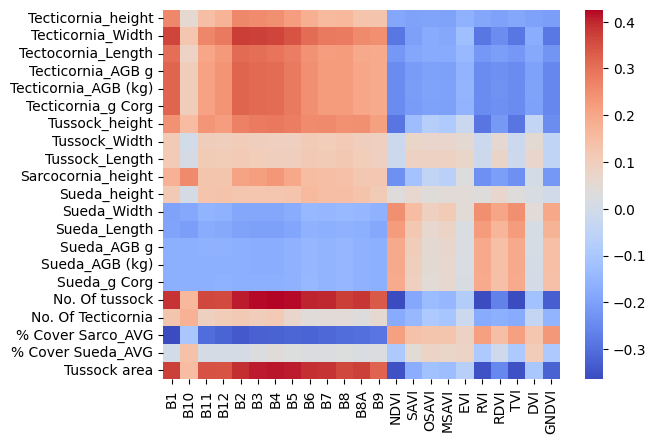

In [412]:
corr = df.corr(method='spearman')

corr = corr.drop(inputs, axis=1)
corr = corr.drop(['Plot #', 'system:index', 'lat', 'QA10', 'QA60', 'lng', 'QA20', 'Longitude', 'Elevation', 'Latitude'], axis=1)

corr = corr.drop(outputs, axis=0)
corr = corr.drop(['lat', 'system:index', 'Plot #', 'QA10', 'QA60', 'lng', 'QA20', 'Elevation', 'Longitude', 'Latitude'], axis=0)

sb.heatmap(corr.T, cmap="coolwarm", annot=False)

# Machine Learning Analysis

### GAM

In [395]:
def analyse_gam(input_df, target_df, name):
    na_rows = target_df.isna()
    # Get the latent variable (y value) from the dataframe. Also remove NaN rows if any
#     y = target_df[~na_rows].values.copy()
    y = target_df.values.copy()

    
    # Get the inputs (x values) from the dataframe
#     X = input_df[~na_rows].values.copy()
    X = input_df.values.copy()
    
    X = (X-X.min())/(X.max()-X.min())
    
    y = (y - y.min()) / (y.max() - y.min())
    
    
    # Train the algorithm on training data-
    gam = LogisticGAM().fit(X, y)
    predicted = gam.predict_mu(X)
    
    scores_df = pd.DataFrame()
    
    scores_df['name'] = [name]
    scores_df['predicted'] = [predicted]
    scores_df['observed'] = [y]
    slope, intercept, r_value, p_value, std_err = stats.linregress(y, predicted)
    scores_df['r_value'] = std_err
    scores_df['std_err'] = r_value
    scores_df['p_value'] = p_value
#     scores_df['summary'] = [gam.summary()]
    scores_df['accuracy'] = [gam.accuracy(X, y)]
    
    return scores_df

In [392]:
imp = KNNImputer(n_neighbors=1, weights="distance")
imp.fit(df[outputs])

# the model learns that the second feature is double the first
df[outputs] = imp.transform(df[outputs])

In [393]:
df[outputs]

,Tecticornia_height,Tecticornia_Width,Tectocornia_Length,Tecticornia_AGB g,Tecticornia_AGB (kg),Tecticornia_g Corg,Tussock_height,Tussock_Width,Tussock_Length,Sarcocornia_height,...,Sueda_Width,Sueda_Length,Sueda_AGB g,Sueda_AGB (kg),Sueda_g Corg,No. Of tussock,No. Of Tecticornia,% Cover Sarco_AVG,% Cover Sueda_AVG,Tussock area
0,42.0,43.0,46.0,48.442378,0.048442,22.855114,76.0,27.0,23.0,9.0,...,5.0,2.0,4.71785,0.004718,2.225882,0.0,0.0,78.75,0.0,0.000000
1,20.0,25.0,25.0,3.416911,0.003417,1.612099,7.0,50.0,50.0,20.0,...,6.0,8.0,24.09785,0.024098,11.369366,0.0,0.0,78.75,0.0,0.000000
2,20.0,25.0,25.0,3.416911,0.003417,1.612099,7.0,50.0,50.0,17.0,...,7.0,5.0,17.46785,0.017468,8.241332,0.0,0.0,78.75,0.0,0.000000
3,42.0,43.0,46.0,48.442378,0.048442,22.855114,7.0,50.0,50.0,9.0,...,5.0,2.0,4.71785,0.004718,2.225882,0.0,0.0,78.75,0.0,0.000000
4,20.0,25.0,25.0,3.416911,0.003417,1.612099,7.0,50.0,50.0,20.0,...,6.0,8.0,24.09785,0.024098,11.369366,0.0,0.0,78.75,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,84.0,173.0,161.0,225.584813,0.225585,106.430915,50.0,25.0,20.0,19.0,...,40.0,43.0,876.81785,0.876818,413.682662,13.0,0.0,26.25,0.0,5105.088062
1131,84.0,173.0,161.0,225.584813,0.225585,106.430915,60.0,40.0,40.0,9.0,...,40.0,43.0,876.81785,0.876818,413.682662,13.0,0.0,26.25,0.0,16336.281799
1132,84.0,173.0,161.0,225.584813,0.225585,106.430915,70.0,60.0,50.0,14.0,...,40.0,43.0,876.81785,0.876818,413.682662,13.0,0.0,26.25,0.0,30630.528373
1133,84.0,173.0,161.0,225.584813,0.225585,106.430915,35.0,25.0,20.0,10.0,...,40.0,43.0,876.81785,0.876818,413.682662,13.0,0.0,26.25,0.0,5105.088062


In [407]:
scores_gam = pd.DataFrame()

for output in outputs[:]:
    try:
        # Initialise the model
        print(output)
        score = analyse_gam(df[inputs], df[output], output)
        scores_gam = pd.concat([scores_gam, score], ignore_index=True)
    except:
        continue

Tecticornia_height


/opt/conda/lib/python3.10/site-packages/pygam/pygam.py:1112: RuntimeWarning: invalid value encountered in double_scalars
  r2['McFadden'] = full_ll/null_ll
/opt/conda/lib/python3.10/site-packages/pygam/pygam.py:1113: RuntimeWarning: invalid value encountered in double_scalars
  r2['McFadden_adj'] = 1. - (full_ll - self.statistics_['edof'])/null_ll


Tecticornia_Width


/opt/conda/lib/python3.10/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in divide
  return dist.levels/(mu*(dist.levels - mu))
/opt/conda/lib/python3.10/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/opt/conda/lib/python3.10/site-packages/pygam/links.py:133: RuntimeWarning: overflow encountered in exp
  elp = np.exp(lp)
/opt/conda/lib/python3.10/site-packages/pygam/links.py:134: RuntimeWarning: invalid value encountered in divide
  return dist.levels * elp / (elp + 1)
/opt/conda/lib/python3.10/site-packages/pygam/pygam.py:591: RuntimeWarning: overflow encountered in square
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/opt/conda/lib/python3.10/site-packages/pygam/links.py:149: RuntimeWarning: overflow encountered in divide
  return dist.levels/(mu*(dist.levels - mu))
/opt/conda/lib/python3.10/site-packages/pygam/pyg

Tectocornia_Length


/opt/conda/lib/python3.10/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in divide
  return dist.levels/(mu*(dist.levels - mu))
/opt/conda/lib/python3.10/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/opt/conda/lib/python3.10/site-packages/pygam/pygam.py:591: RuntimeWarning: overflow encountered in square
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/opt/conda/lib/python3.10/site-packages/pygam/links.py:133: RuntimeWarning: overflow encountered in exp
  elp = np.exp(lp)
/opt/conda/lib/python3.10/site-packages/pygam/links.py:134: RuntimeWarning: invalid value encountered in divide
  return dist.levels * elp / (elp + 1)
/opt/conda/lib/python3.10/site-packages/pygam/links.py:149: RuntimeWarning: overflow encountered in divide
  return dist.levels/(mu*(dist.levels - mu))
/opt/conda/lib/python3.10/site-packages/pygam/pyg

Tecticornia_AGB g


/opt/conda/lib/python3.10/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in divide
  return dist.levels/(mu*(dist.levels - mu))
/opt/conda/lib/python3.10/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/opt/conda/lib/python3.10/site-packages/pygam/links.py:133: RuntimeWarning: overflow encountered in exp
  elp = np.exp(lp)
/opt/conda/lib/python3.10/site-packages/pygam/links.py:134: RuntimeWarning: invalid value encountered in divide
  return dist.levels * elp / (elp + 1)
/opt/conda/lib/python3.10/site-packages/pygam/pygam.py:591: RuntimeWarning: overflow encountered in square
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/opt/conda/lib/python3.10/site-packages/pygam/utils.py:725: RuntimeWarning: divide by zero encountered in divide
  out[mask] = y[mask] * np.log(y[mask] / u[mask])
/opt/conda/lib/python3.10/site-package

Tecticornia_AGB (kg)


/opt/conda/lib/python3.10/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in divide
  return dist.levels/(mu*(dist.levels - mu))
/opt/conda/lib/python3.10/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/opt/conda/lib/python3.10/site-packages/pygam/links.py:133: RuntimeWarning: overflow encountered in exp
  elp = np.exp(lp)
/opt/conda/lib/python3.10/site-packages/pygam/links.py:134: RuntimeWarning: invalid value encountered in divide
  return dist.levels * elp / (elp + 1)
/opt/conda/lib/python3.10/site-packages/pygam/pygam.py:591: RuntimeWarning: overflow encountered in square
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/opt/conda/lib/python3.10/site-packages/pygam/utils.py:725: RuntimeWarning: divide by zero encountered in divide
  out[mask] = y[mask] * np.log(y[mask] / u[mask])
/opt/conda/lib/python3.10/site-package

Tecticornia_g Corg


/opt/conda/lib/python3.10/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in divide
  return dist.levels/(mu*(dist.levels - mu))
/opt/conda/lib/python3.10/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/opt/conda/lib/python3.10/site-packages/pygam/links.py:133: RuntimeWarning: overflow encountered in exp
  elp = np.exp(lp)
/opt/conda/lib/python3.10/site-packages/pygam/links.py:134: RuntimeWarning: invalid value encountered in divide
  return dist.levels * elp / (elp + 1)
/opt/conda/lib/python3.10/site-packages/pygam/links.py:149: RuntimeWarning: overflow encountered in divide
  return dist.levels/(mu*(dist.levels - mu))
/opt/conda/lib/python3.10/site-packages/pygam/pygam.py:591: RuntimeWarning: overflow encountered in square
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *


Tussock_height


/opt/conda/lib/python3.10/site-packages/pygam/pygam.py:1112: RuntimeWarning: invalid value encountered in double_scalars
  r2['McFadden'] = full_ll/null_ll
/opt/conda/lib/python3.10/site-packages/pygam/pygam.py:1113: RuntimeWarning: invalid value encountered in double_scalars
  r2['McFadden_adj'] = 1. - (full_ll - self.statistics_['edof'])/null_ll


Tussock_Width


/opt/conda/lib/python3.10/site-packages/pygam/links.py:133: RuntimeWarning: overflow encountered in exp
  elp = np.exp(lp)
/opt/conda/lib/python3.10/site-packages/pygam/links.py:134: RuntimeWarning: invalid value encountered in divide
  return dist.levels * elp / (elp + 1)
/opt/conda/lib/python3.10/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in divide
  return dist.levels/(mu*(dist.levels - mu))
/opt/conda/lib/python3.10/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/opt/conda/lib/python3.10/site-packages/pygam/pygam.py:591: RuntimeWarning: overflow encountered in square
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/opt/conda/lib/python3.10/site-packages/pygam/links.py:149: RuntimeWarning: overflow encountered in divide
  return dist.levels/(mu*(dist.levels - mu))


Tussock_Length


/opt/conda/lib/python3.10/site-packages/pygam/pygam.py:1112: RuntimeWarning: invalid value encountered in double_scalars
  r2['McFadden'] = full_ll/null_ll
/opt/conda/lib/python3.10/site-packages/pygam/pygam.py:1113: RuntimeWarning: invalid value encountered in double_scalars
  r2['McFadden_adj'] = 1. - (full_ll - self.statistics_['edof'])/null_ll


Sarcocornia_height


/opt/conda/lib/python3.10/site-packages/pygam/pygam.py:1112: RuntimeWarning: invalid value encountered in double_scalars
  r2['McFadden'] = full_ll/null_ll
/opt/conda/lib/python3.10/site-packages/pygam/pygam.py:1113: RuntimeWarning: invalid value encountered in double_scalars
  r2['McFadden_adj'] = 1. - (full_ll - self.statistics_['edof'])/null_ll


Sueda_height


/opt/conda/lib/python3.10/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in divide
  return dist.levels/(mu*(dist.levels - mu))
/opt/conda/lib/python3.10/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/opt/conda/lib/python3.10/site-packages/pygam/links.py:133: RuntimeWarning: overflow encountered in exp
  elp = np.exp(lp)
/opt/conda/lib/python3.10/site-packages/pygam/links.py:134: RuntimeWarning: invalid value encountered in divide
  return dist.levels * elp / (elp + 1)
/opt/conda/lib/python3.10/site-packages/pygam/pygam.py:591: RuntimeWarning: overflow encountered in square
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/opt/conda/lib/python3.10/site-packages/pygam/links.py:149: RuntimeWarning: overflow encountered in divide
  return dist.levels/(mu*(dist.levels - mu))
/opt/conda/lib/python3.10/site-packages/pygam/pyg

Sueda_Width


/opt/conda/lib/python3.10/site-packages/pygam/pygam.py:1112: RuntimeWarning: invalid value encountered in double_scalars
  r2['McFadden'] = full_ll/null_ll
/opt/conda/lib/python3.10/site-packages/pygam/pygam.py:1113: RuntimeWarning: invalid value encountered in double_scalars
  r2['McFadden_adj'] = 1. - (full_ll - self.statistics_['edof'])/null_ll


Sueda_Length


/opt/conda/lib/python3.10/site-packages/pygam/pygam.py:1112: RuntimeWarning: invalid value encountered in double_scalars
  r2['McFadden'] = full_ll/null_ll
/opt/conda/lib/python3.10/site-packages/pygam/pygam.py:1113: RuntimeWarning: invalid value encountered in double_scalars
  r2['McFadden_adj'] = 1. - (full_ll - self.statistics_['edof'])/null_ll


Sueda_AGB g


/opt/conda/lib/python3.10/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in divide
  return dist.levels/(mu*(dist.levels - mu))
/opt/conda/lib/python3.10/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/opt/conda/lib/python3.10/site-packages/pygam/pygam.py:591: RuntimeWarning: overflow encountered in square
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/opt/conda/lib/python3.10/site-packages/pygam/links.py:133: RuntimeWarning: overflow encountered in exp
  elp = np.exp(lp)
/opt/conda/lib/python3.10/site-packages/pygam/links.py:134: RuntimeWarning: invalid value encountered in divide
  return dist.levels * elp / (elp + 1)
/opt/conda/lib/python3.10/site-packages/pygam/links.py:149: RuntimeWarning: overflow encountered in divide
  return dist.levels/(mu*(dist.levels - mu))


Sueda_AGB (kg)


/opt/conda/lib/python3.10/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in divide
  return dist.levels/(mu*(dist.levels - mu))
/opt/conda/lib/python3.10/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/opt/conda/lib/python3.10/site-packages/pygam/pygam.py:591: RuntimeWarning: overflow encountered in square
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/opt/conda/lib/python3.10/site-packages/pygam/links.py:133: RuntimeWarning: overflow encountered in exp
  elp = np.exp(lp)
/opt/conda/lib/python3.10/site-packages/pygam/links.py:134: RuntimeWarning: invalid value encountered in divide
  return dist.levels * elp / (elp + 1)
/opt/conda/lib/python3.10/site-packages/pygam/links.py:149: RuntimeWarning: overflow encountered in divide
  return dist.levels/(mu*(dist.levels - mu))
/opt/conda/lib/python3.10/site-packages/pygam/pyg

Sueda_g Corg


/opt/conda/lib/python3.10/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in divide
  return dist.levels/(mu*(dist.levels - mu))
/opt/conda/lib/python3.10/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/opt/conda/lib/python3.10/site-packages/pygam/pygam.py:591: RuntimeWarning: overflow encountered in square
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/opt/conda/lib/python3.10/site-packages/pygam/links.py:133: RuntimeWarning: overflow encountered in exp
  elp = np.exp(lp)
/opt/conda/lib/python3.10/site-packages/pygam/links.py:134: RuntimeWarning: invalid value encountered in divide
  return dist.levels * elp / (elp + 1)
/opt/conda/lib/python3.10/site-packages/pygam/links.py:149: RuntimeWarning: overflow encountered in divide
  return dist.levels/(mu*(dist.levels - mu))
/opt/conda/lib/python3.10/site-packages/pygam/pyg

No. Of tussock


/opt/conda/lib/python3.10/site-packages/pygam/pygam.py:1112: RuntimeWarning: invalid value encountered in double_scalars
  r2['McFadden'] = full_ll/null_ll
/opt/conda/lib/python3.10/site-packages/pygam/pygam.py:1113: RuntimeWarning: invalid value encountered in double_scalars
  r2['McFadden_adj'] = 1. - (full_ll - self.statistics_['edof'])/null_ll


No. Of Tecticornia


/opt/conda/lib/python3.10/site-packages/pygam/pygam.py:1112: RuntimeWarning: invalid value encountered in double_scalars
  r2['McFadden'] = full_ll/null_ll
/opt/conda/lib/python3.10/site-packages/pygam/pygam.py:1113: RuntimeWarning: invalid value encountered in double_scalars
  r2['McFadden_adj'] = 1. - (full_ll - self.statistics_['edof'])/null_ll


% Cover Sarco_AVG


/opt/conda/lib/python3.10/site-packages/pygam/pygam.py:1112: RuntimeWarning: invalid value encountered in double_scalars
  r2['McFadden'] = full_ll/null_ll
/opt/conda/lib/python3.10/site-packages/pygam/pygam.py:1113: RuntimeWarning: invalid value encountered in double_scalars
  r2['McFadden_adj'] = 1. - (full_ll - self.statistics_['edof'])/null_ll


% Cover Sueda_AVG


/opt/conda/lib/python3.10/site-packages/pygam/pygam.py:1112: RuntimeWarning: invalid value encountered in double_scalars
  r2['McFadden'] = full_ll/null_ll
/opt/conda/lib/python3.10/site-packages/pygam/pygam.py:1113: RuntimeWarning: invalid value encountered in double_scalars
  r2['McFadden_adj'] = 1. - (full_ll - self.statistics_['edof'])/null_ll


Tussock area


/opt/conda/lib/python3.10/site-packages/pygam/pygam.py:1112: RuntimeWarning: invalid value encountered in double_scalars
  r2['McFadden'] = full_ll/null_ll
/opt/conda/lib/python3.10/site-packages/pygam/pygam.py:1113: RuntimeWarning: invalid value encountered in double_scalars
  r2['McFadden_adj'] = 1. - (full_ll - self.statistics_['edof'])/null_ll


In [408]:
scores_gam

,name,predicted,observed,r_value,std_err,p_value,accuracy
0,Tecticornia_height,"[0.34743939628367243, 0.34743939628367243, 0.3...","[0.2740740740740741, 0.1111111111111111, 0.111...",0.012994,0.780399,2.729140e-233,0.003524
1,Tecticornia_Width,"[0.16540700976538084, 0.16540700976538084, 0.1...","[0.0815450643776824, 0.04291845493562231, 0.04...",0.012619,0.829945,1.803101e-289,0.013216
2,Tectocornia_Length,"[0.20350091374026585, 0.20350091374026585, 0.2...","[0.09210526315789473, 0.046052631578947366, 0....",0.012638,0.820191,4.649479e-277,0.008811
3,Tecticornia_AGB g,"[0.019309247242200133, 0.019309247242200133, 0...","[0.0004321298659269029, 3.0405703989542938e-05...",0.012094,0.837265,2.568003e-299,0.004405
4,Tecticornia_AGB (kg),"[0.019309247242192053, 0.019309247242192053, 0...","[0.00043212986592690284, 3.040570398954294e-05...",0.012094,0.837265,2.568003e-299,0.012335
5,Tussock_height,"[0.12916301816150555, 0.12916301816150555, 0.1...","[0.4303030303030303, 0.012121212121212121, 0.0...",0.013077,0.829425,8.651999e-289,0.147137
6,Tussock_Length,"[0.15982016672685934, 0.15982016672685934, 0.1...","[0.12179487179487179, 0.2948717948717949, 0.29...",0.013332,0.632212,1.052823e-127,0.096916
7,Sarcocornia_height,"[0.15266378936599667, 0.15266378936599667, 0.1...","[0.1125, 0.25, 0.2125, 0.1125, 0.25, 0.2, 0.2,...",0.013158,0.591498,4.643150e-108,0.004405
8,Sueda_height,"[0.19089665431602243, 0.19089665431602243, 0.1...","[0.11538461538461536, 0.1282051282051282, 0.11...",0.013467,0.723447,1.590720e-184,0.001762
9,Sueda_Width,"[0.12555105515343995, 0.12555105515343995, 0.1...","[0.02857142857142857, 0.03571428571428571, 0.0...",0.013340,0.654444,9.898871e-140,0.041410


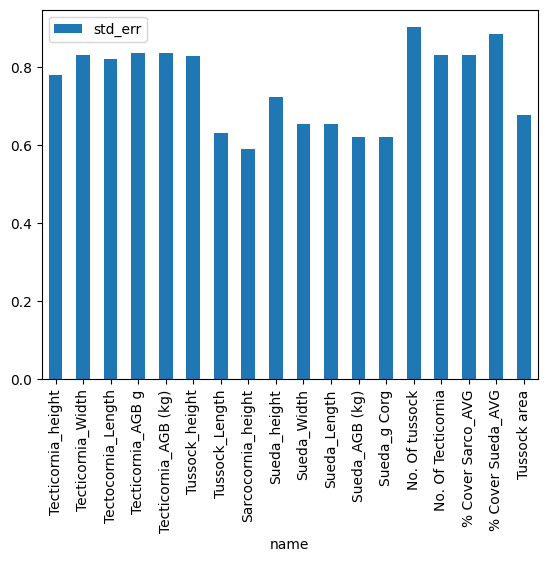

In [409]:
plot_gam_acc = scores_gam.plot.bar(x='name', y='std_err', rot=0)
for item in plot_gam_acc.get_xticklabels():
    item.set_rotation(90)

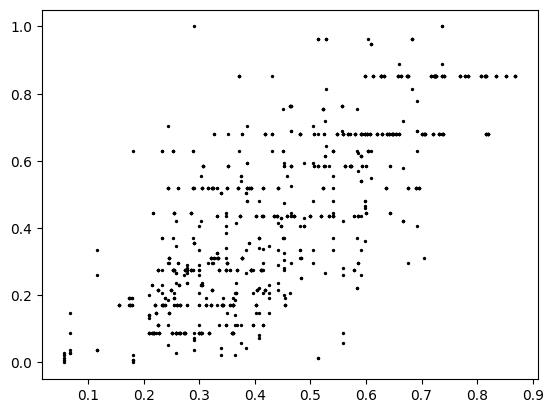

In [410]:
plt.scatter(scores_gam['predicted'][0], scores_gam['observed'][0], c ="black", s=2)
plt.show()

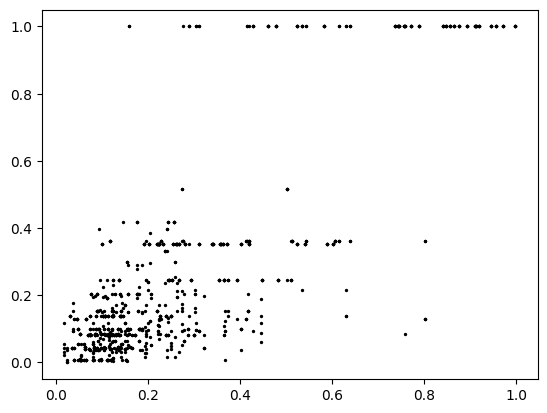

In [411]:
plt.scatter(scores_gam['predicted'][1], scores_gam['observed'][1], c ="black", s=2)
plt.show()

In [ ]:
df.to_csv('c')